# Lab - Cleaning Numerical Data

### 1. Import the necessary libraries.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### 2. Load csv into the variable customer_df
### 3. Look at its main features (head, shape, info)

In [31]:
customer_df = pd.read_csv('/Users/szabonikolett/Desktop/Ironhack-Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
pd.set_option('display.max_columns', None) 
display(customer_df.shape)
customer_df.head(5)


(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [32]:
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


### 4. Rename the columns 

In [34]:
cols = []
for column in range(len(customer_df.columns)):
    cols.append(customer_df.columns[column].lower().replace(' ', '_')) 
customer_df.columns = cols

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 5. Change effective to date column to datetime format.

In [35]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [36]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [7]:
def check_numerical_type(dataset, limit): # need 2 parameter or I get the error to set 2 
    discrete = pd.DataFrame() # creating dataframe 
    continuous = pd.DataFrame()
    for name in dataset.columns:
        if len(dataset[name].unique()) < limit: # where limit is in the function, the number I want the limit to be
            print(name, 'is discrete')
            discrete[name] = dataset[name]
        else:
            print(name, 'is continuous')
            continuous[name] = dataset[name]
    return discrete, continuous

discrete_df, continouos_df = check_numerical_type(customer_df, 10)

customer is continuous
state is discrete
customer_lifetime_value is continuous
response is discrete
coverage is discrete
education is discrete
effective_to_date is continuous
employmentstatus is discrete
gender is discrete
income is continuous
location_code is discrete
marital_status is discrete
monthly_premium_auto is continuous
months_since_last_claim is continuous
months_since_policy_inception is continuous
number_of_open_complaints is discrete
number_of_policies is discrete
policy_type is discrete
policy is discrete
renew_offer_type is discrete
sales_channel is discrete
total_claim_amount is continuous
vehicle_class is discrete
vehicle_size is discrete


### 7. Plot a correlation matrix, comment what you see.

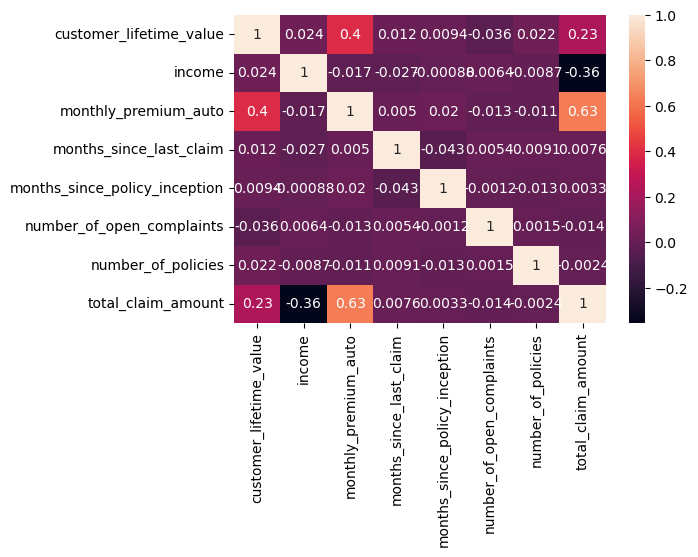

In [37]:
corr_matrix=customer_df.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# income and total_claim_amount are negatively highly correlated, indicating that if one increases, the other one would decrease.
# also, we can see a relatively positively high correlcation between monthly_premium_auto and total_claim_amount, if one goes up 
# so does the other one, might be dropped, not sure at this point

### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

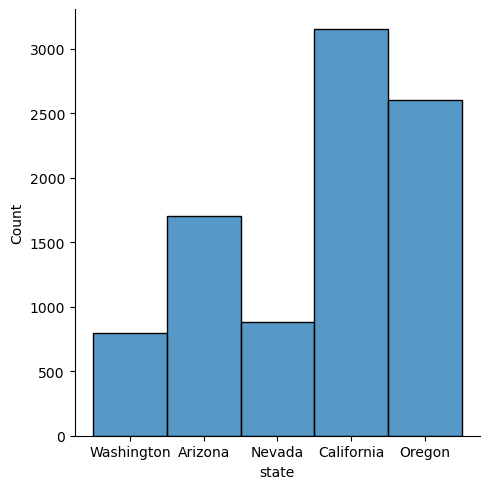

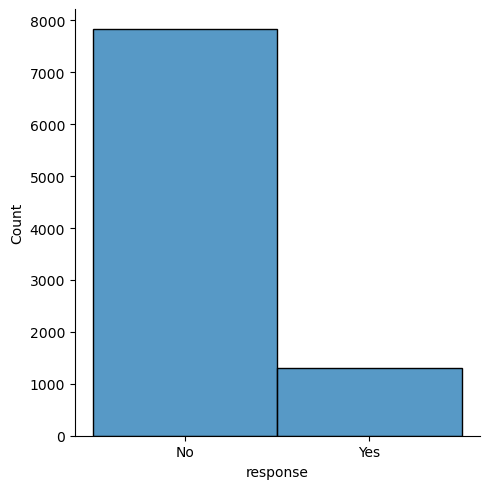

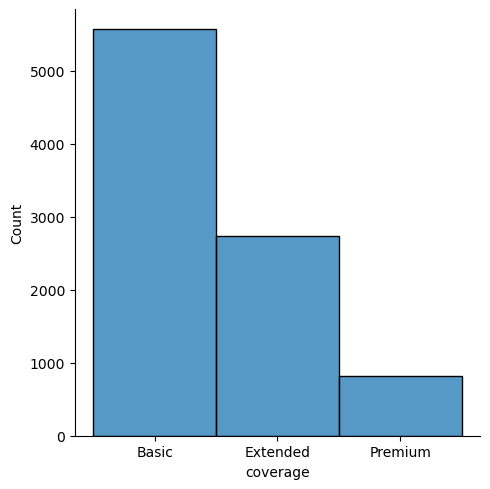

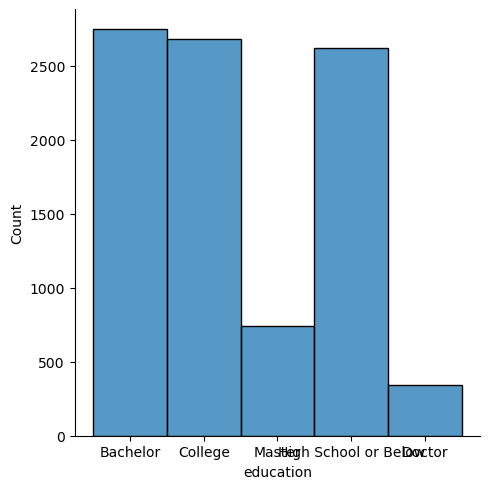

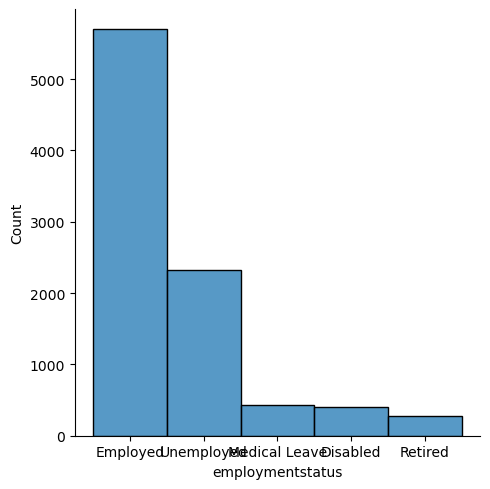

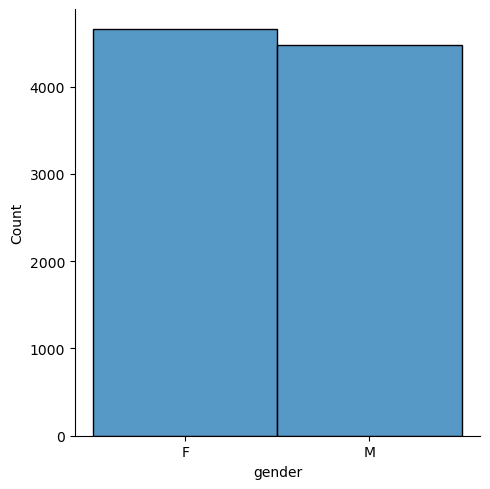

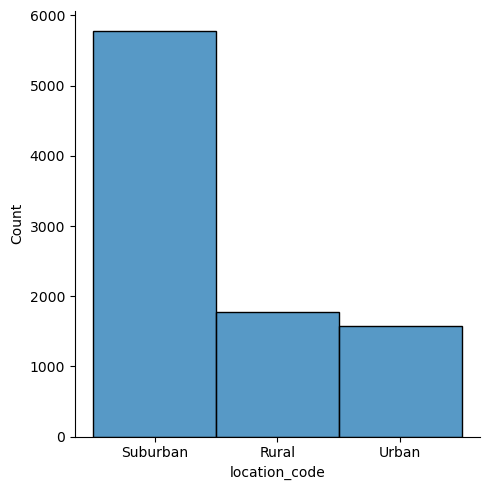

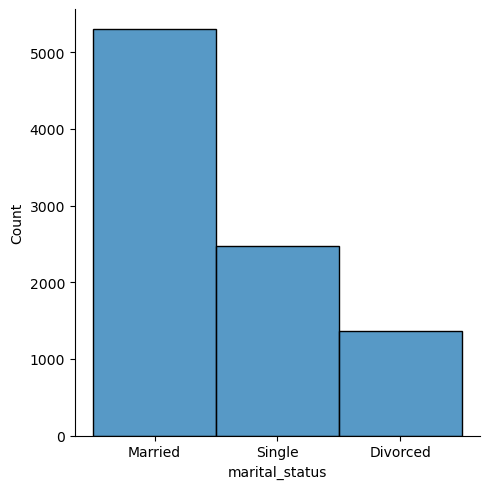

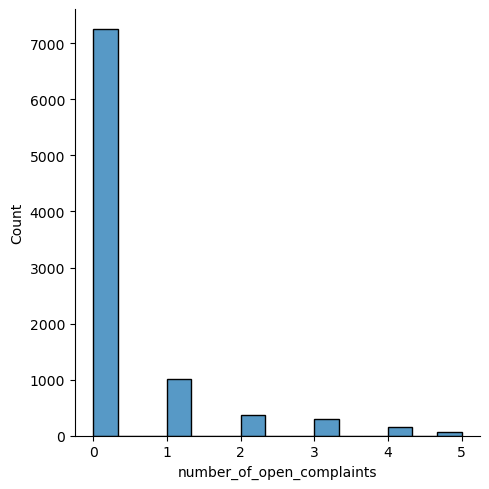

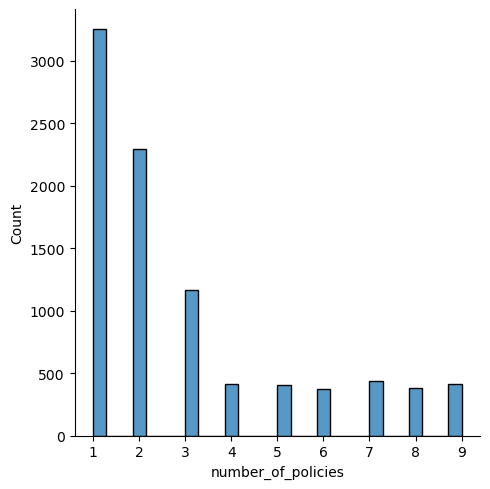

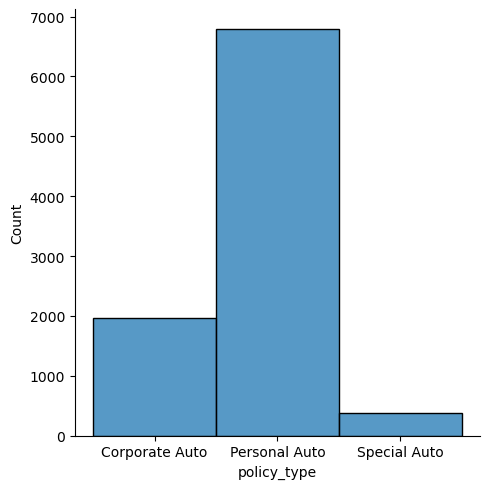

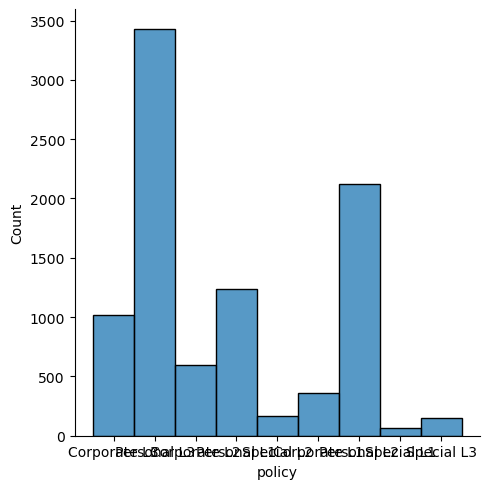

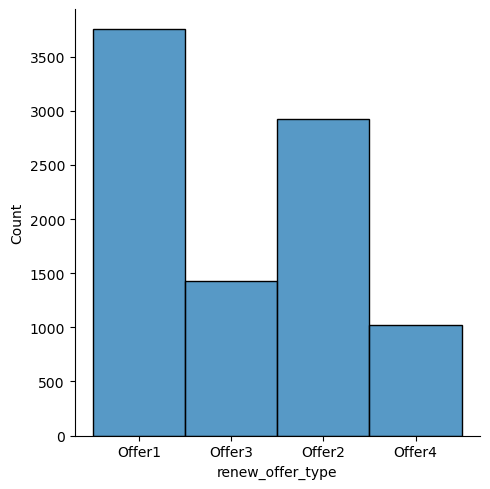

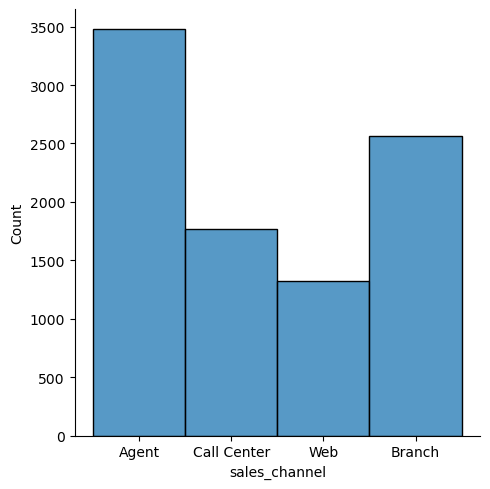

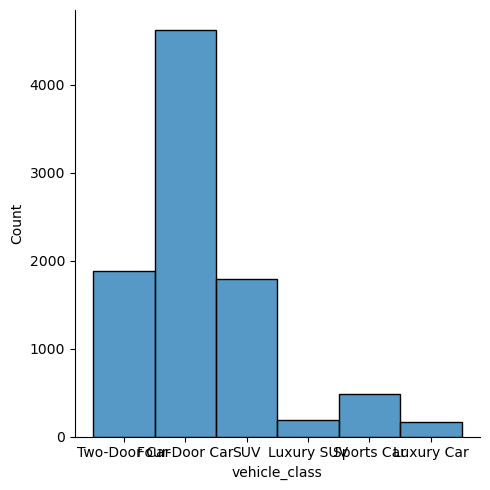

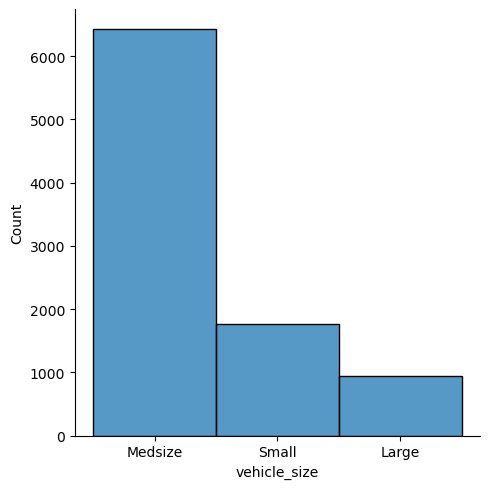

In [10]:
def show_plot(data):
    for col in discrete_df.columns:
        sns.displot(discrete_df[col])
        plt.show()
    
show_plot(discrete_df)

In [11]:
continouos_df.head()

,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,QZ44356,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,AI49188,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,WW63253,7645.861827,2011-01-20,0,106,18,65,529.881344
4,HB64268,2813.692575,2011-02-03,43836,73,12,44,138.130879


In [49]:
# dropping customer as it has only unique values

continouos_df = continouos_df.drop(['customer'], axis = 1) # already droppint, won't execute again

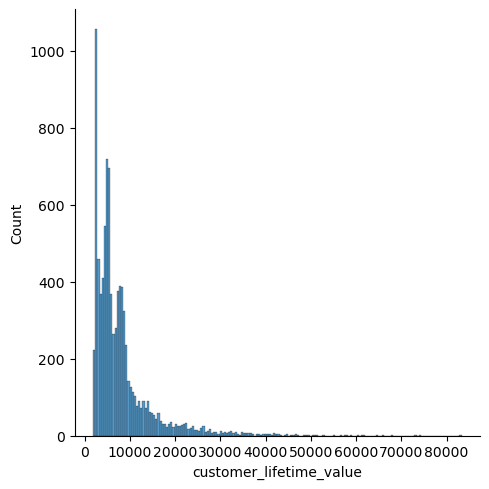

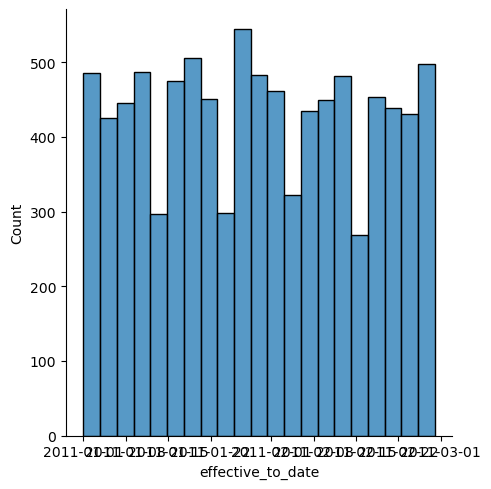

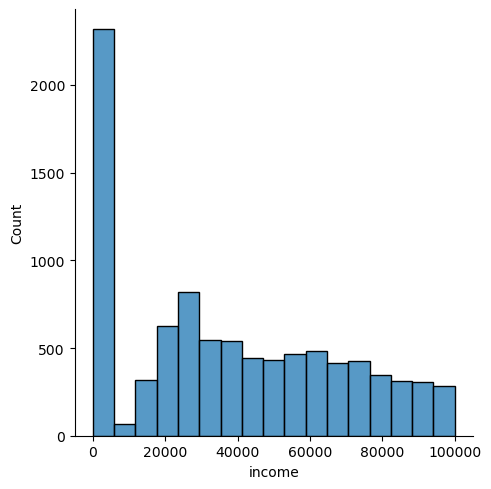

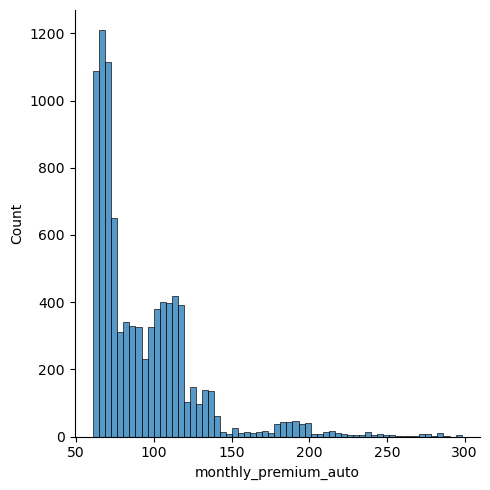

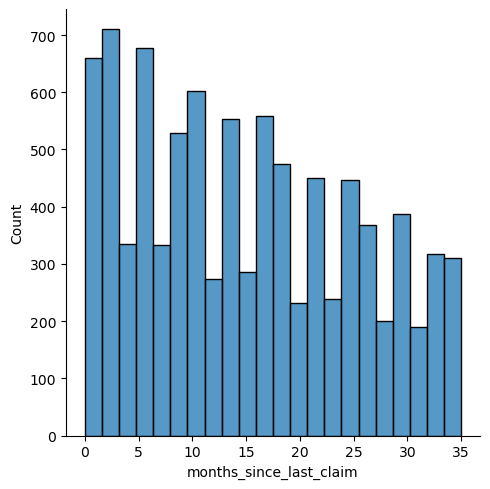

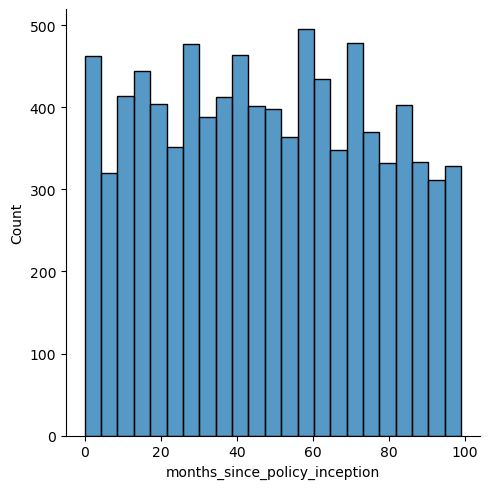

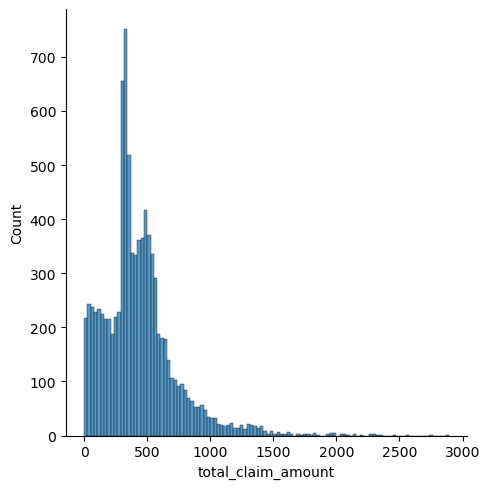

In [13]:
# option 1
def show_plot(data):
    for col in continouos_df.columns:
        sns.displot(continouos_df[col])
        plt.show()
    
show_plot(continouos_df)

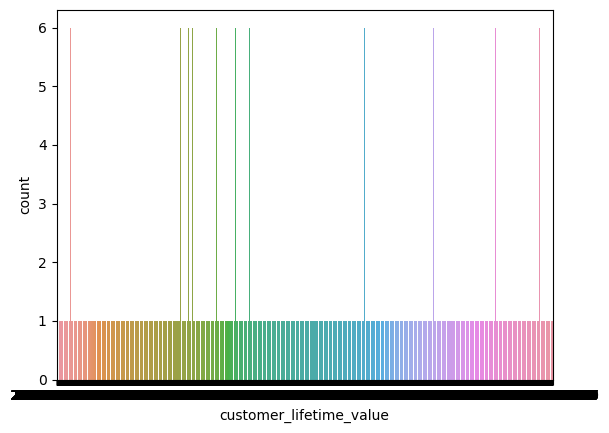

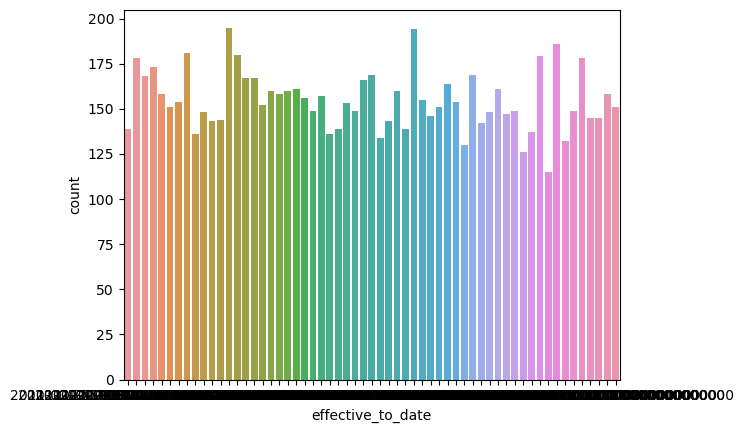

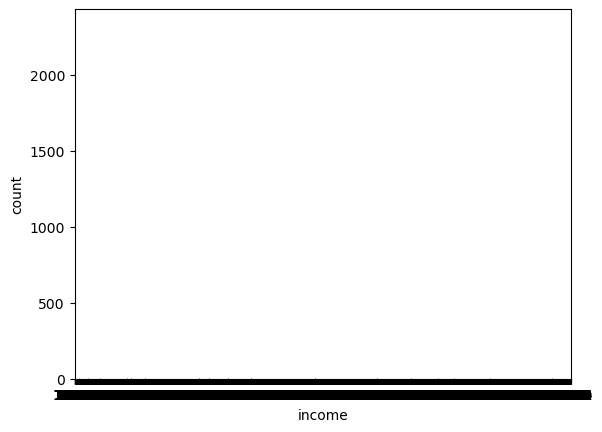

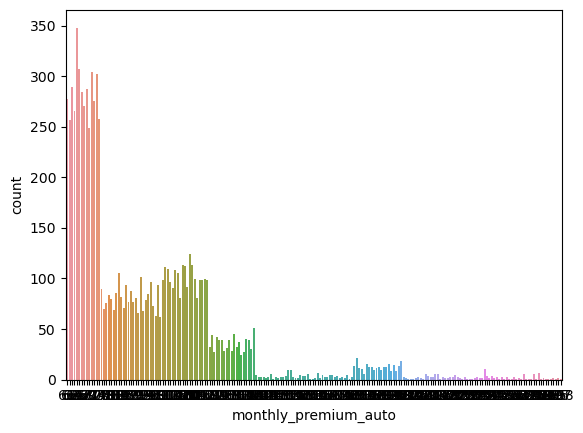

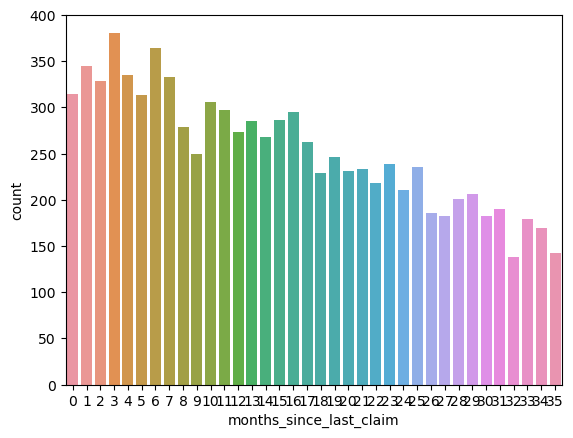

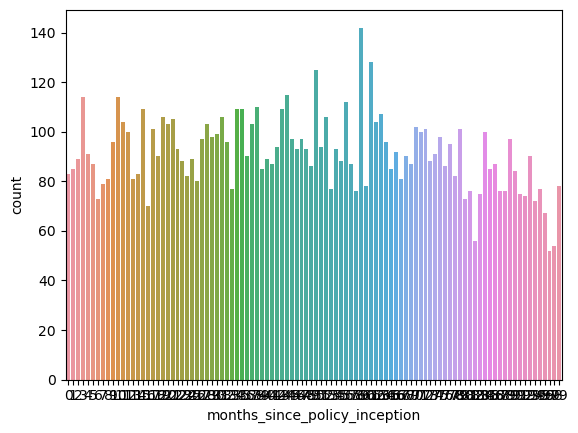

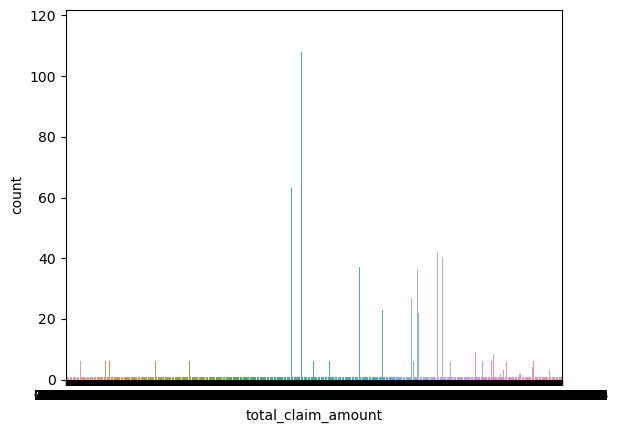

In [14]:
# option 2
def countplot_continouos(df):
    for column in continouos_df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None
   

countplot_continouos(continouos_df)


### 9. Comment what you can see in the plots.

In [15]:
# In the discrete_df we have a few imbalanced columns, along with some which could be encoded.

### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

### 11. Did you find outliers? Comment what you will do with them.

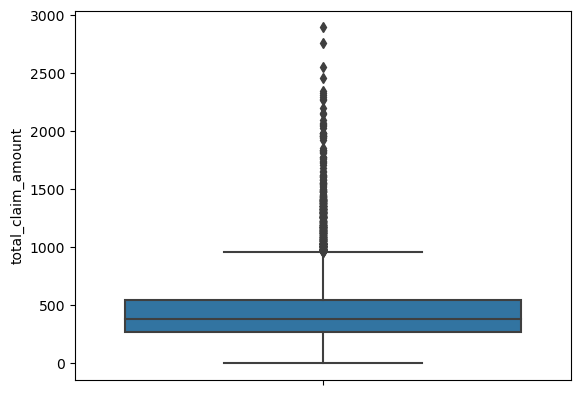

In [16]:
sns.boxplot(y=continouos_df['total_claim_amount'])
plt.show()

In [17]:
# significant amount of outliers above the whisker

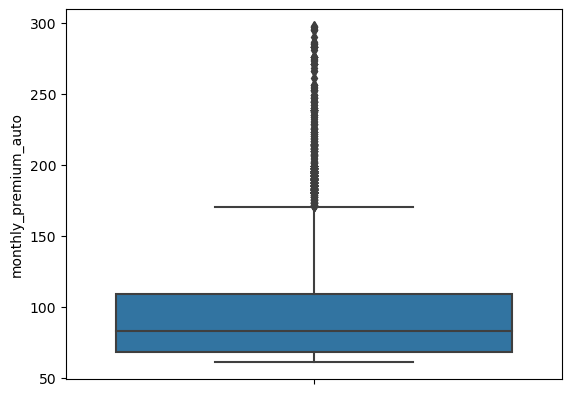

In [18]:
sns.boxplot(y=continouos_df['monthly_premium_auto']) 
plt.show()

In [19]:
# I got a problem with this outlier, that I am lacking the information about what montly_premium_auto represents. 
# Liaising or insuring a car which qualifies as premium? 
# Without such information no decision can be made on solid grounds. 

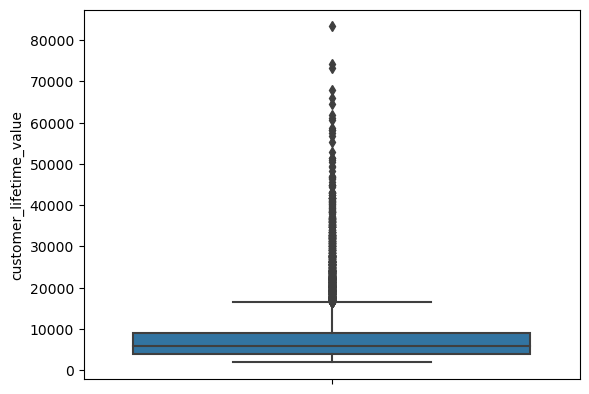

In [20]:
sns.boxplot(y=continouos_df['customer_lifetime_value'])
plt.show()

In [21]:
# I would not drop the outliers here, in case of customer retention, customer_lifetime_value is a significant feature, 
# should not be ignored or manipulated into the lower 75%. 

### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [22]:
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [23]:
# There is no Nan value in the whole df, no need to deal with them. 

# Lab | Cleaning categorical data

### 2. Find all of the categorical data. Save it in a categorical_df variable.

In [24]:
categorical_df = customer_df.select_dtypes(object)
display(categorical_df.shape)
categorical_df.head(5)

(9134, 15)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 3. Check for NaN values.

In [25]:
# Already checked it in the whole dataframe, there was no NaN value. 

### 4. Check all unique values of columns.

### 5. Check dtypes. Do they all make sense as categorical data?

### 6. Does any column contain alpha and numeric data? Decide how to clean it.

### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [26]:
print(categorical_df['state']. unique()) # keeping the values like this
print(categorical_df['response']. unique()) # onehot encode
print(categorical_df['coverage']. unique()) # onehot encode
print(categorical_df['education']. unique())  # check unique values, might combine lower values together 
print(categorical_df['employmentstatus']. unique()) # check unique values, might combine lower values together 
print(categorical_df['location_code']. unique()) # onehot encode 
print(categorical_df['marital_status']. unique()) # onehot encode
print(categorical_df['policy_type']. unique()) # onehot encode
print(categorical_df['policy']. unique()) # drop it
print(categorical_df['renew_offer_type']. unique()) # onehot encode
print(categorical_df['sales_channel']. unique()) # onehot encode
print(categorical_df['vehicle_class']. unique()) # # check unique values, might combine luxury together 
print(categorical_df['vehicle_size']. unique()) # onehot encode


['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [32]:
# making a fuction for all the print statements above
def unique_val(df):
    for i in df:
        
        print(i,":" , categorical_df[i].unique())
    
    return

In [35]:
unique_val(categorical_df)

customer : ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response : ['No' 'Yes']
coverage : ['Basic' 'Extended' 'Premium']
education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus : ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender : ['F' 'M']
location_code : ['Suburban' 'Rural' 'Urban']
marital_status : ['Married' 'Single' 'Divorced']
policy_type : ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy : ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type : ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel : ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class : ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size : ['Medsize' 'Small' 'Large']


### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [40]:
print(categorical_df['policy_type']. unique()) # onehot encode

['Corporate Auto' 'Personal Auto' 'Special Auto']


In [39]:
print(categorical_df['policy']. unique()) # drop it

['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']


### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

I would keep policy_type. 

Regarding the vehicle characteristics, I would drop the vehicle_size and keep the vehicle_class. 

# Lab | Feature extraction

### 1. Open the categoricals variable we created before.

In [29]:
categorical_df = categorical_df.select_dtypes(object)
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

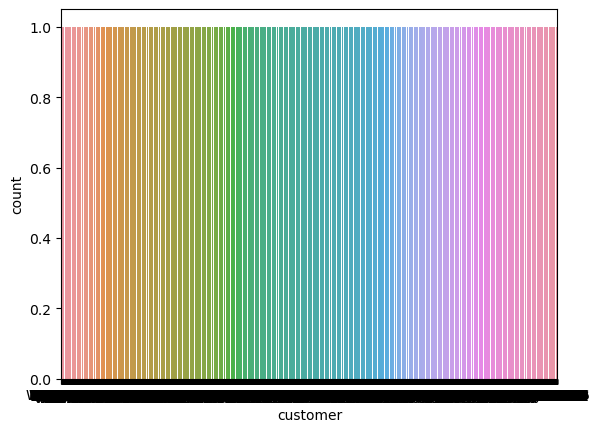

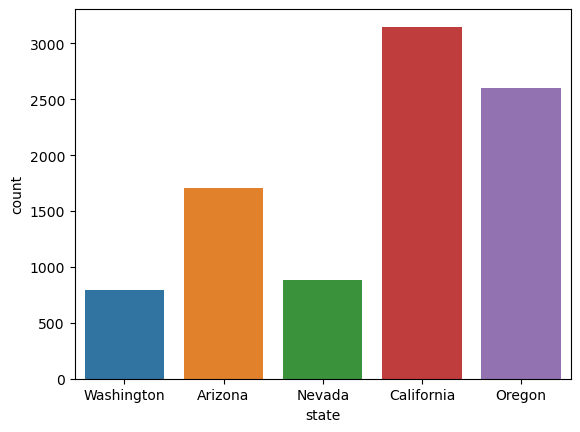

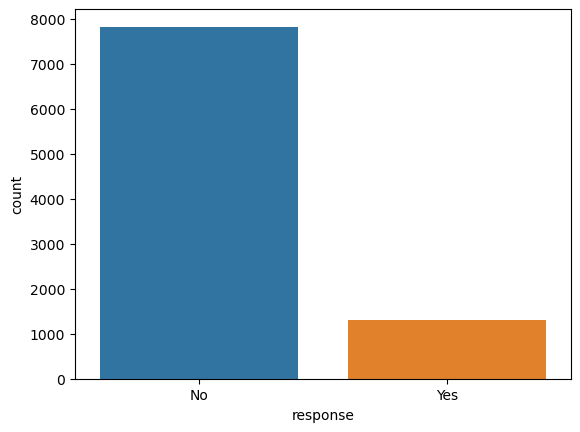

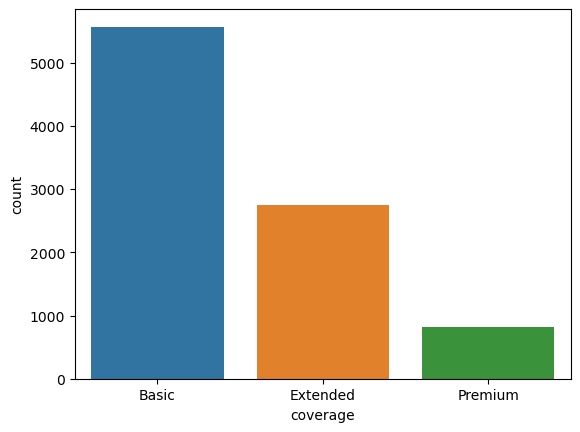

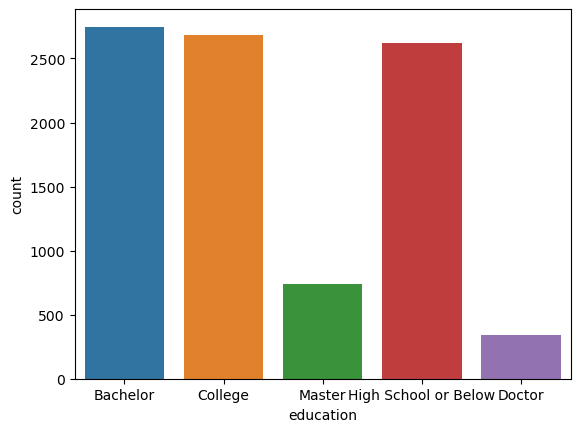

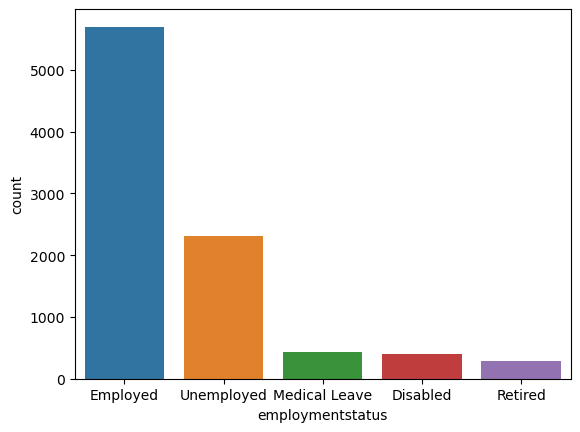

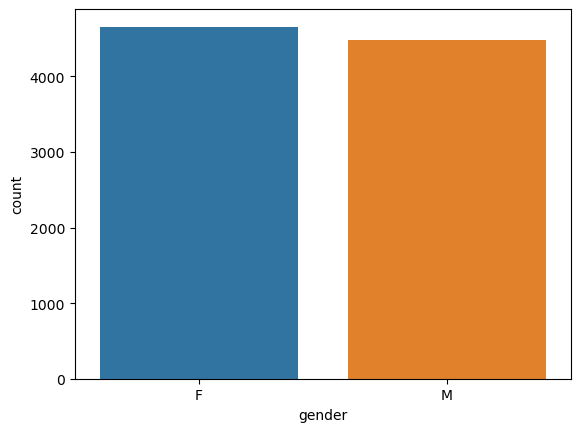

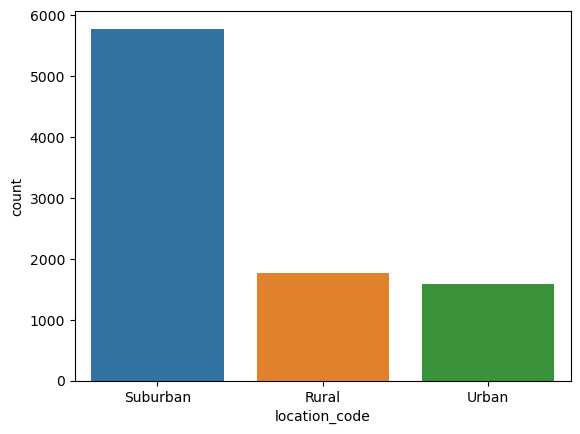

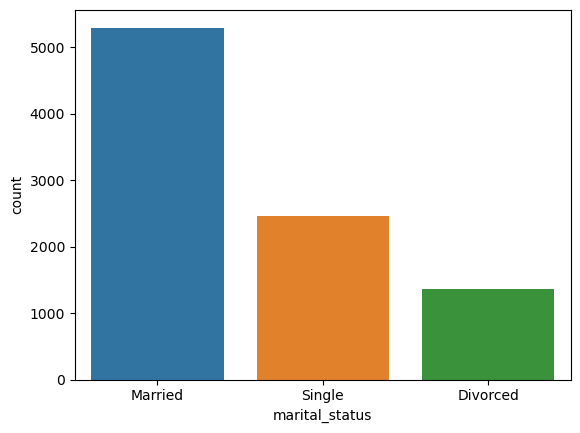

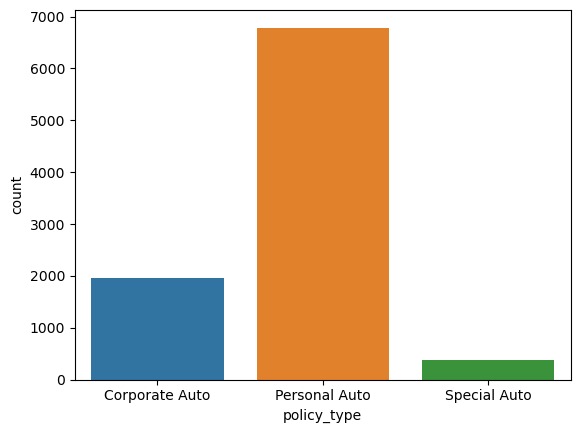

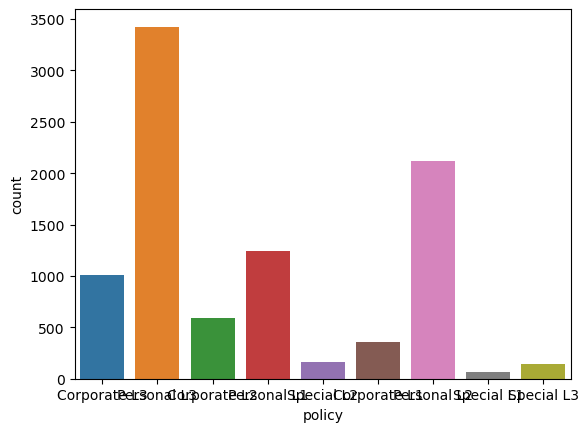

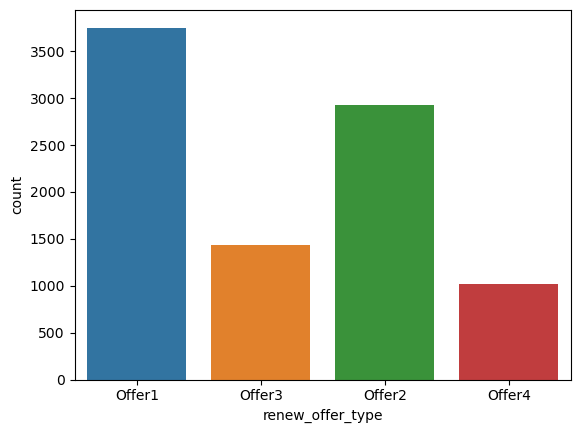

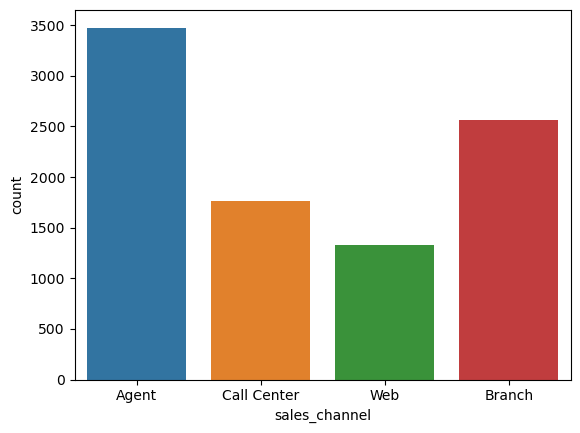

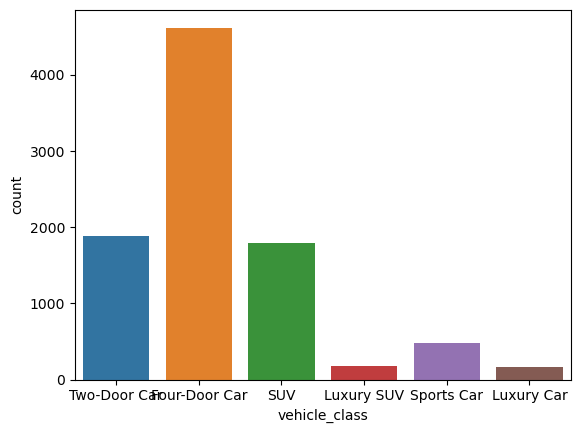

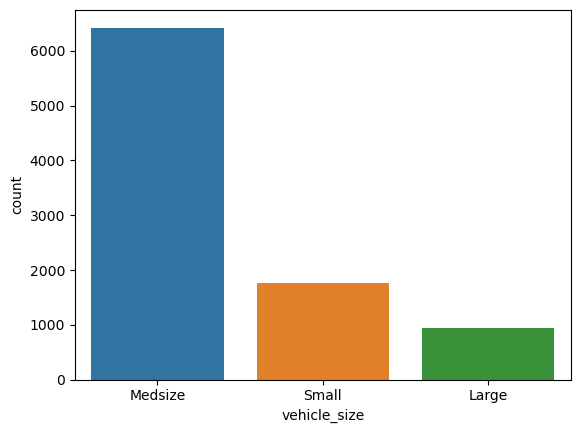

In [30]:
def plot_cat(i):
    
    for column in categorical_df.columns:
        sns.countplot(x=categorical_df[column])
        plt.show()
    
plot_cat(column)

def plot_cat(i):
    
    for i in categorical_df.columns:
        sns.countplot(x=categorical_df[i])
        plt.show()
    
plot_cat(i)

We can see some imbalanced values, e.g. response value

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

policy (already suggested to drop it), policy_tpye 

vehicle_class and size might be dropped based on their to matching values

or group sports / luxury car

### 4. Plot time variable. Can you extract something from it?

In [43]:
time_df = customer_df[['effective_to_date', 'customer']]

In [45]:
time_df = time_df.groupby(['effective_to_date']).agg({'customer':pd.Series.nunique}) # removing the shadow from the graph

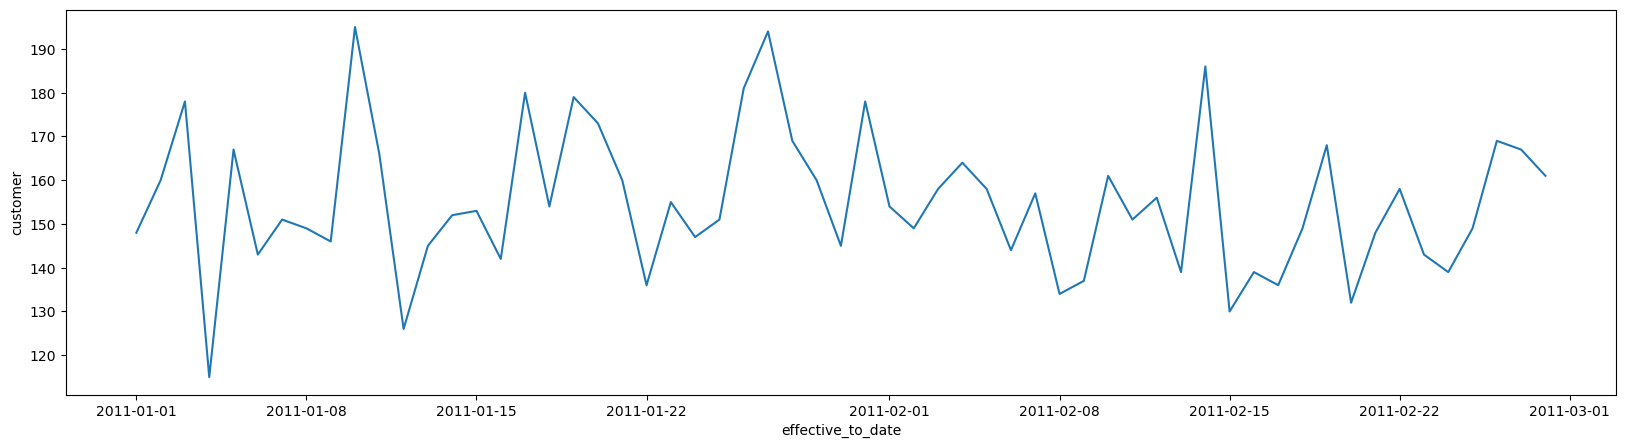

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,5))
sns.lineplot(data = time_df, x= 'effective_to_date', y= 'customer')
plt.show()